In [1]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import TensorBoard
from keras.layers.convolutional import Conv2D

from time import time


Using TensorFlow backend.


In [7]:
import skimage
from skimage import io
from skimage import data
import os

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels



In [52]:
ROOT_PATH = "C:/Users/jenil/Downloads/BelgiumTSC_Training/"
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")

print(train_data_directory)

images, labels = load_data(train_data_directory)

C:/Users/jenil/Downloads/BelgiumTSC_Training/Training


C:\Users\jenil\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\jenil\Anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


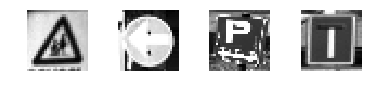

In [53]:
import numpy as np
# Import the `pyplot` module
import matplotlib.pyplot as plt 
%matplotlib inline
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [54]:
# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))


In [58]:

# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = images28.reshape(images28.shape[0], images28.shape[1], images28.shape[2], 1).astype('float32')
X_test = test_images28.reshape(test_images28.shape[0], test_images28.shape[1], test_images28.shape[2], 1).astype('float32')

# one hot encode
number_of_classes = 62
#y_train = np_utils.to_categorical(y_train, number_of_classes)
#y_test = np_utils.to_categorical(y_test, number_of_classes)

# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))


In [60]:


# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200)

Train on 4575 samples, validate on 2520 samples
Epoch 1/15
4575/4575 [==============================] - 12s 3ms/step - loss: 0.3152 - acc: 0.9086 - val_loss: 0.3904 - val_acc: 0.8988
Epoch 2/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.2473 - acc: 0.9259 - val_loss: 0.3884 - val_acc: 0.9016
Epoch 3/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.2214 - acc: 0.9357 - val_loss: 0.4151 - val_acc: 0.8948
Epoch 4/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.1908 - acc: 0.9414 - val_loss: 0.3728 - val_acc: 0.9071
Epoch 5/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.1615 - acc: 0.9515 - val_loss: 0.3559 - val_acc: 0.9119
Epoch 6/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.1522 - acc: 0.9528 - val_loss: 0.3596 - val_acc: 0.9202
Epoch 7/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.1320 - acc: 0.9604 - val_loss: 0.3238 - val_acc: 0.9266
Epoch 8

In [61]:
# Save the model
model.save('C://Users/jenil/traffic_keras_97.h5')

In [62]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200)

Train on 4575 samples, validate on 2520 samples
Epoch 1/15
4575/4575 [==============================] - 12s 3ms/step - loss: 0.0943 - acc: 0.9709 - val_loss: 0.3313 - val_acc: 0.9274
Epoch 2/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.0749 - acc: 0.9766 - val_loss: 0.3435 - val_acc: 0.9250
Epoch 3/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.0602 - acc: 0.9827 - val_loss: 0.3181 - val_acc: 0.9361
Epoch 4/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.0600 - acc: 0.9825 - val_loss: 0.3019 - val_acc: 0.9361
Epoch 5/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.0649 - acc: 0.9792 - val_loss: 0.3554 - val_acc: 0.9238
Epoch 6/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.0571 - acc: 0.9799 - val_loss: 0.3597 - val_acc: 0.9278
Epoch 7/15
4575/4575 [==============================] - 10s 2ms/step - loss: 0.0480 - acc: 0.9873 - val_loss: 0.3418 - val_acc: 0.9266
Epoch 8

In [72]:
y_hat = model.predict_classes(X_test)

In [84]:
import pandas as pd
k=pd.DataFrame(y_hat)

In [96]:
p=[]
for n in y_test:
    for j in range(len(n)) :
        if n[j] ==1 :
            p.append(j)
            
    

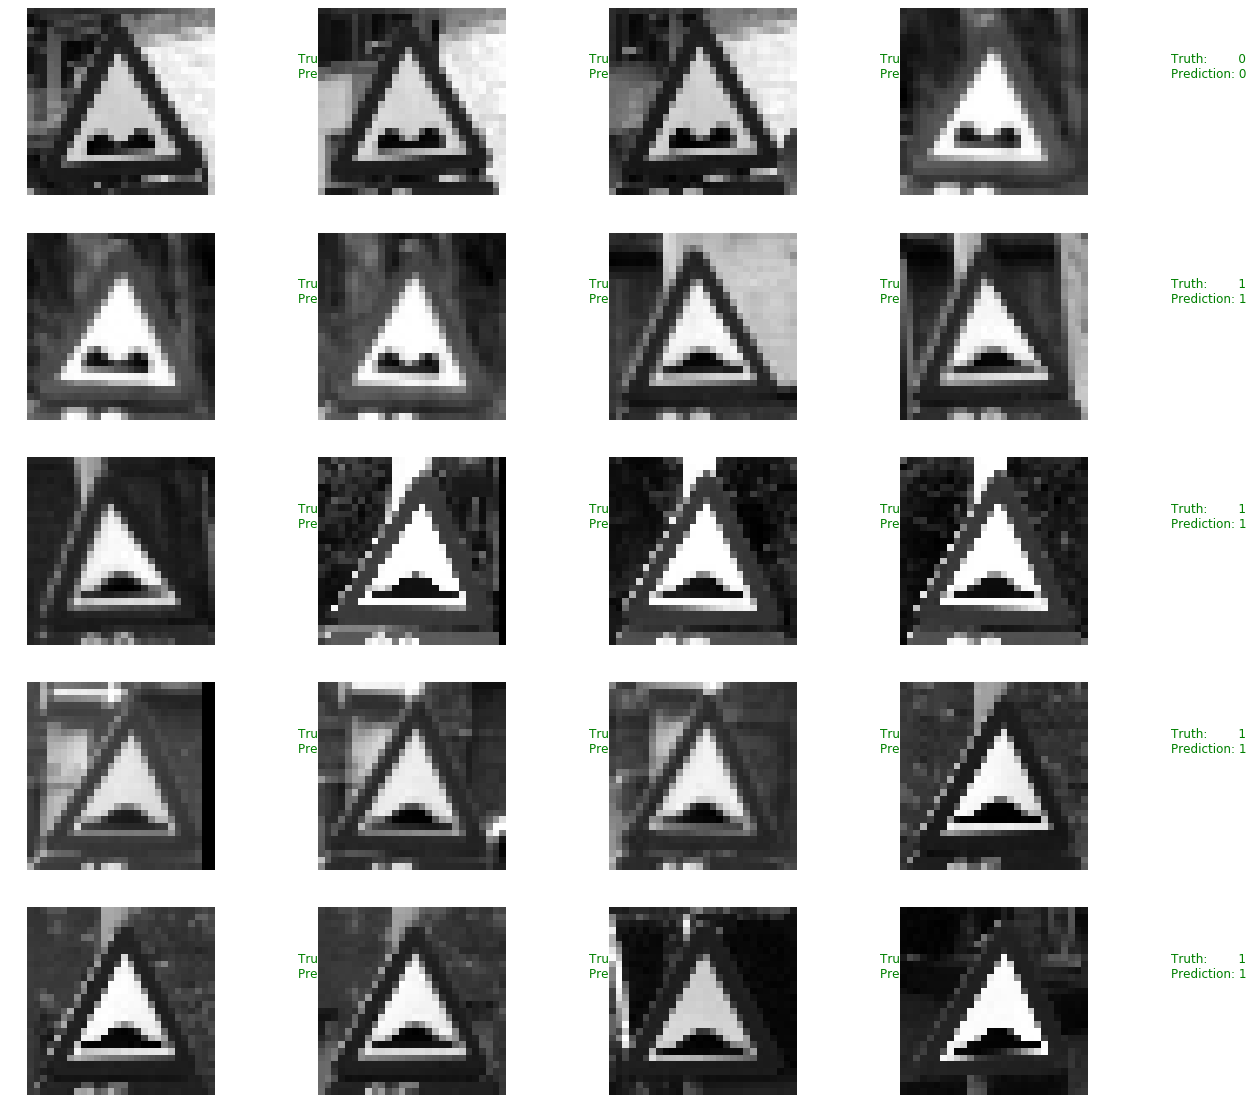

In [109]:
fig = plt.figure(figsize=(20, 20))
for i in range(20):
    truth = test_labels[i]
    prediction = p[i]
    plt.subplot(5, 4,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(test_images28[i],  cmap="gray")

plt.show()